<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/32_SuperDenseCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


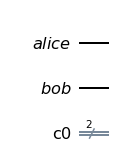

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qA = QuantumRegister(1,name='alice')
qB = QuantumRegister(1,name='bob')
c = ClassicalRegister(2)
qc = QuantumCircuit(qA,qB,c)
qc.draw('mpl')

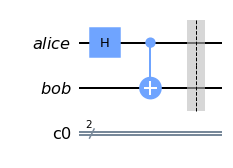

In [ ]:
qc.h(qA[0])
qc.cx(qA[0],qB[0])
qc.barrier()
qc.draw('mpl')

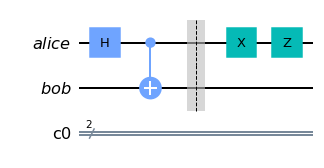

In [ ]:
message = '11'
if message == '00':
    qc.i(qA[0])
elif message == '01':
    qc.x(qA[0])
elif message == '10':
    qc.z(qA[0])
elif message == '11':
    qc.x(qA[0])
    qc.z(qA[0])
qc.barrier
qc.barrier
qc.draw('mpl')

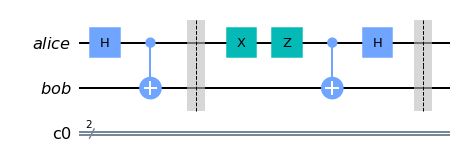

In [ ]:
qc.cx(qA[0],qB[0])
qc.h(qA[0])
qc.barrier()
qc.draw('mpl')

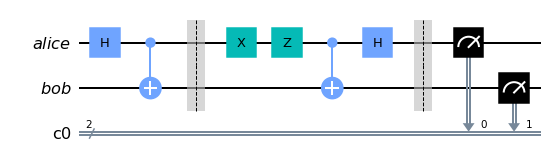

In [ ]:
qc.measure(qA[0],c[0])
qc.measure(qB[0],c[1])
qc.draw('mpl')

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 1024}


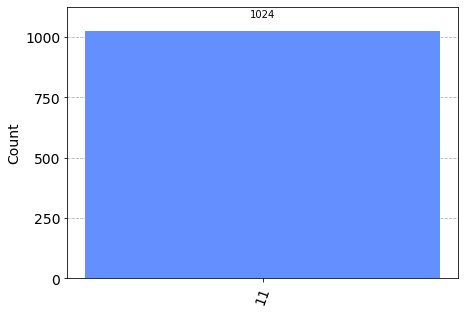

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
from qiskit.test.mock import FakeBelem
device_simulator = FakeBelem()

<ipython-input-10-6ec0d51f09de>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeBelem


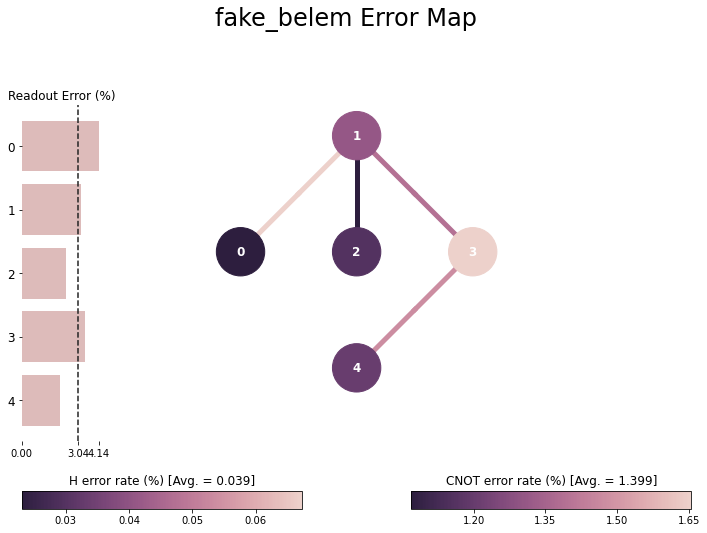

In [ ]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

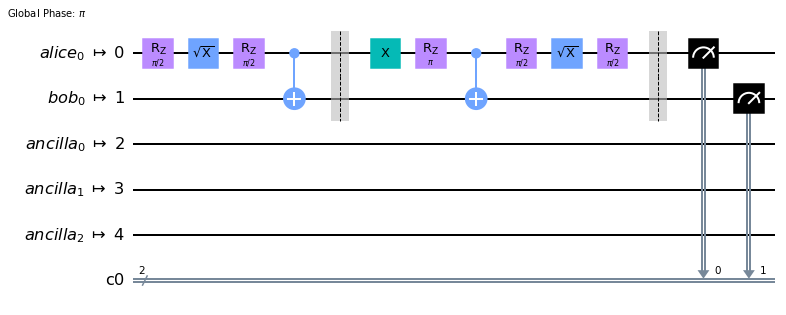

In [ ]:
qc2 = transpile(qc,device_simulator)
qc2.draw('mpl')

In [ ]:
job = device_simulator.run(qc2,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'01': 55, '00': 15, '10': 72, '11': 882}


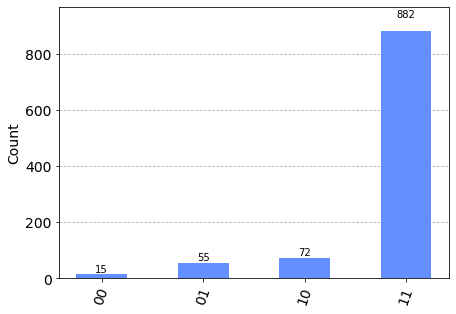

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)